# Inspect SNIPS Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [28]:
df_dev = pd.read_csv("../TEXTOIR/data/snips/dev.tsv",sep='\t')
df_train = pd.read_csv("../TEXTOIR/data/snips/train.tsv",sep='\t')
df_test = pd.read_csv("../TEXTOIR/data/snips/test.tsv",sep='\t')

In [15]:
if (df_dev['label'].unique().all() == df_train['label'].unique().all()) & (df_train['label'].unique().all() == df_test['label'].unique().all()):
    print('All Labels are represented in every split.')
else:
    print('Dataset not properly stratisfied.')

All Labels are represented in every split.


## EDA

In [17]:
df_dev.shape

(700, 2)

In [18]:
df_train.shape

(13084, 2)

In [19]:
df_test.shape

(700, 2)

In [16]:
for label in df_dev['label'].unique():
    print(label)

AddToPlaylist
BookRestaurant
GetWeather
PlayMusic
RateBook
SearchCreativeWork
SearchScreeningEvent


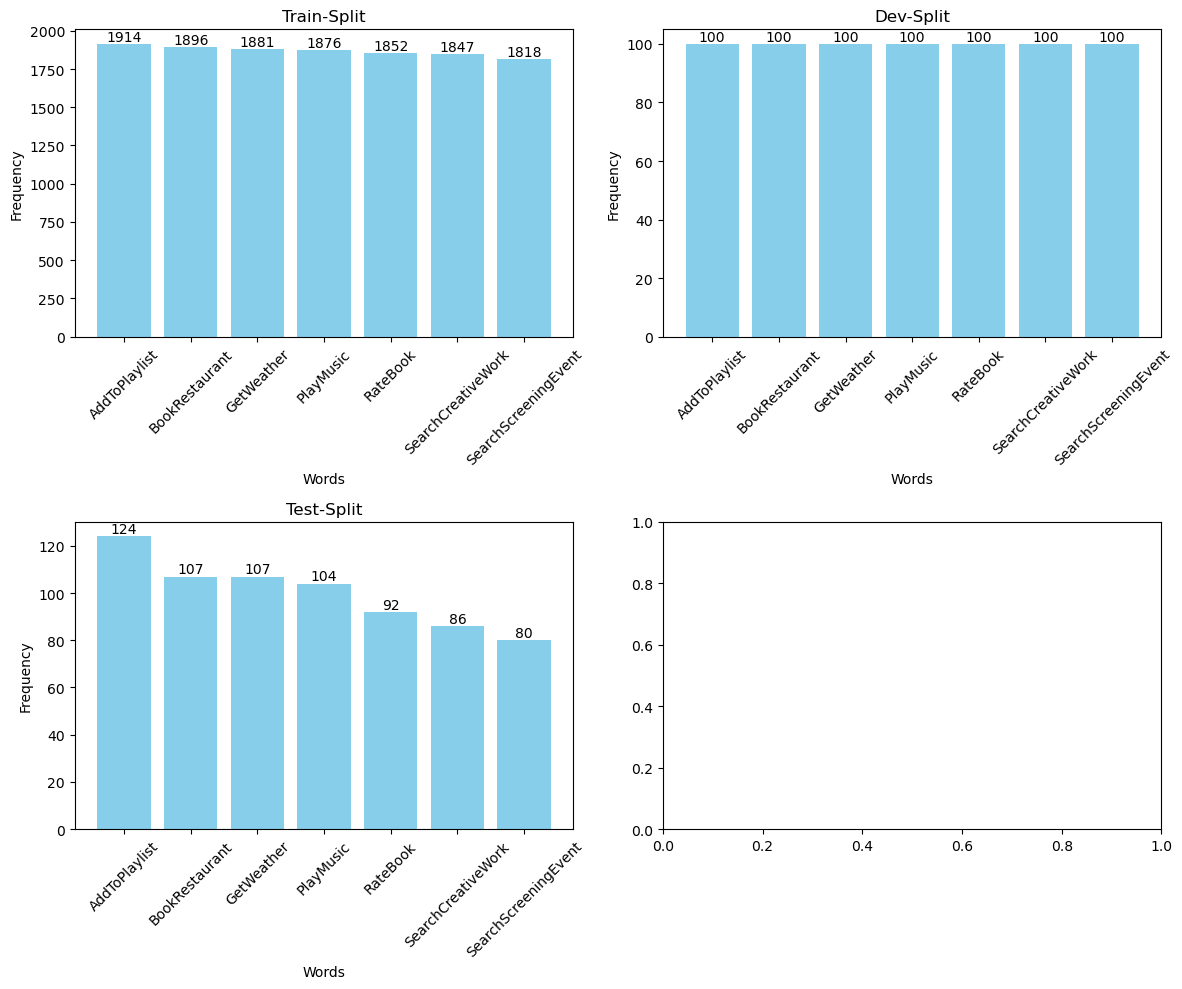

In [35]:
word_counts_train = Counter([word for word in df_train['label']])
word_counts_df_train = pd.DataFrame(word_counts_train.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

word_counts_dev = Counter([word for word in df_dev['label']])
word_counts_df_dev = pd.DataFrame(word_counts_dev.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

word_counts_test = Counter([word for word in df_test['label']])
word_counts_df_test = pd.DataFrame(word_counts_test.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# 5. Create the subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 6. Plot the histogram in the first subplot (upper-left)
# 6. Plot the histogram in the first subplot (upper-left)
bars_train = axs[0, 0].bar(word_counts_df['Word'], word_counts_df_train['Frequency'], color='skyblue')
axs[0, 0].set_title('Train-Split')
axs[0, 0].set_xlabel('Words')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].tick_params(axis='x', rotation=45)

for bar in bars_train:
    yval = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, yval + 0.1,  # Position the number slightly above the bar
                    round(yval, 2), ha='center', va='bottom', fontsize=10)


bars_dev = axs[0, 1].bar(word_counts_df['Word'], word_counts_df_dev['Frequency'], color='skyblue')
axs[0, 1].set_title('Dev-Split')
axs[0, 1].set_xlabel('Words')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].tick_params(axis='x', rotation=45)

for bar in bars_dev:
    yval = bar.get_height()
    axs[0, 1].text(bar.get_x() + bar.get_width() / 2, yval + 0.1,  # Position the number slightly above the bar
                    round(yval, 2), ha='center', va='bottom', fontsize=10)

bars_test = axs[1, 0].bar(word_counts_df['Word'], word_counts_df_test['Frequency'], color='skyblue')
axs[1, 0].set_title('Test-Split')
axs[1, 0].set_xlabel('Words')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].tick_params(axis='x', rotation=45)

for bar in bars_test:
    yval = bar.get_height()
    axs[1, 0].text(bar.get_x() + bar.get_width() / 2, yval + 0.1,  # Position the number slightly above the bar
                    round(yval, 2), ha='center', va='bottom', fontsize=10)


# 7. Adjust the layout for better spacing
plt.tight_layout()

# 8. Show the plot
plt.show()


## RegEx

In [36]:
df = pd.concat([df_train,df_dev,df_test])

In [37]:
df.shape

(14484, 2)

In [46]:
for label in df['label'].unique():
    print(label)

PlayMusic
AddToPlaylist
RateBook
SearchScreeningEvent
BookRestaurant
GetWeather
SearchCreativeWork


### AddToPlaylist

In [56]:
df_train[df_train['label']=='AddToPlaylist']

,text,label
1,add step to me to the 50 clásicos playlist,AddToPlaylist
4,please add iris dement to my playlist this is ...,AddToPlaylist
5,add slimm cutta calhoun to my this is prince p...,AddToPlaylist
17,add to playlist confidence boost here comes sa...,AddToPlaylist
19,add another artist to the spotlight on country...,AddToPlaylist
...,...,...
13022,add aprite le finestre to my this is earth wi...,AddToPlaylist
13023,add bob klose to la mejor música para tus fies...,AddToPlaylist
13025,add saxophone supremacy to ofelia s calm befor...,AddToPlaylist
13040,add tune to my playist the piano bar,AddToPlaylist


In [ ]:
list_addtoplaylist = {'add', 'playlist', 'album', 'added', 'list', 'put'}


# Combine List A and List B using OR, then combine with List C using AND
pattern_a = '|'.join(rf'\b{word}\b' for word in list_addtoplaylist)  

# Apply the filter
df_filtered = df_train[
    df_train['text'].str.contains(pattern_a, case=False, na=False) 
]

df_non_matching = df_train[~(
    df_train['text'].str.contains(pattern_a, case=False, na=False)
)]

In [71]:
df_filtered.shape

(2259, 2)

In [72]:
df_filtered[df_filtered['label']=='AddToPlaylist']

,text,label
1,add step to me to the 50 clásicos playlist,AddToPlaylist
4,please add iris dement to my playlist this is ...,AddToPlaylist
5,add slimm cutta calhoun to my this is prince p...,AddToPlaylist
17,add to playlist confidence boost here comes sa...,AddToPlaylist
19,add another artist to the spotlight on country...,AddToPlaylist
...,...,...
13022,add aprite le finestre to my this is earth wi...,AddToPlaylist
13023,add bob klose to la mejor música para tus fies...,AddToPlaylist
13025,add saxophone supremacy to ofelia s calm befor...,AddToPlaylist
13040,add tune to my playist the piano bar,AddToPlaylist


In [73]:
df_non_matching[df_non_matching['label']=='AddToPlaylist']

,text,label
1646,place raise your fist onto year in metal 2016,AddToPlaylist
2503,rate tune to 90 s baby makers,AddToPlaylist
3067,rate tune to my natalie macmaster viajes,AddToPlaylist
3975,please include danni bassan in my perfect conc...,AddToPlaylist
4057,the ultimate 90s needs avant que l’ombre à ber...,AddToPlaylist
5664,i would like this artist on drum & breaks,AddToPlaylist
6384,please include emily remler in indie bluegrass,AddToPlaylist
7878,ad i should have known better to this is bb king,AddToPlaylist
7925,include stefanie in pre-party r&b jams,AddToPlaylist
9846,my jazz for loving couples needs more push the...,AddToPlaylist


### PlayMusic

In [76]:
df_train[df_train['label']=='PlayMusic'].head(20)

,text,label
0,listen to westbam alumb allergic on google music,PlayMusic
3,play the song little robin redbreast,PlayMusic
6,i want to listen to seventies music,PlayMusic
7,play a popular chant by brian epstein,PlayMusic
13,can you play me some eighties music by adele,PlayMusic
30,play the top-20 best chicane songs on deezer,PlayMusic
37,play playlist the realest down south,PlayMusic
43,play a chant by mj cole,PlayMusic
51,play all of your toys by chris ledoux,PlayMusic
52,i want to hear a joel hastings melody,PlayMusic


In [94]:
list_playmusic = {'play', 'listen', 'hear', 'track', 'song', 'put', 'turn on', 'last fm', 'lastfm', 'spotify', 'start playing', 'youtube', 'start', 'hip hop', 'rap', 'rock', 'music'}


# Combine List A and List B using OR, then combine with List C using AND
pattern_a = '|'.join(rf'\b{word}\b' for word in list_playmusic)  

# Apply the filter
df_filtered = df_train[
    df_train['text'].str.contains(pattern_a, case=False, na=False) 
]

df_non_matching = df_train[~(
    df_train['text'].str.contains(pattern_a, case=False, na=False)
)]

In [95]:
df_filtered[df_filtered['label']=='PlayMusic']

,text,label
0,listen to westbam alumb allergic on google music,PlayMusic
3,play the song little robin redbreast,PlayMusic
6,i want to listen to seventies music,PlayMusic
7,play a popular chant by brian epstein,PlayMusic
13,can you play me some eighties music by adele,PlayMusic
...,...,...
13049,play fifties music on slacker,PlayMusic
13053,play some dance music,PlayMusic
13059,play music by antonella barba from the album bath,PlayMusic
13069,play a tune from space mandino,PlayMusic


In [96]:
df_non_matching[df_non_matching['label']=='PlayMusic']

,text,label
1886,open the playlist from sergei chatschatrjan,PlayMusic
2109,please anything good by chieko ochi,PlayMusic
3352,create a theme station with jim creeggan recor...,PlayMusic
3738,plpay my disco fever playlist,PlayMusic
7277,plya a tune by kancherla gopanna from 1951 on ...,PlayMusic
7444,will you pull up my jueves de antaño playlist,PlayMusic
8168,sort eighties ep from the last,PlayMusic
8879,i want ohear the 1996 soundtrack from deezer,PlayMusic
10160,please open pandora for me,PlayMusic
10207,plkay some sixties movement songs from itunes,PlayMusic


### RateBook

In [191]:
df_train[df_train['label']=='RateBook'].head(20)

,text,label
2,i give this current textbook a rating value of...,RateBook
11,rate this series a 5,RateBook
27,give this novel 5 stars,RateBook
31,i want to give this current textbook 4 points,RateBook
47,rate this album a 1,RateBook
54,rate in stars as a 6 for lord of the shadows w...,RateBook
56,rate my current book 1 out of 6,RateBook
62,for the textbook out of 6 possible i give the...,RateBook
65,rate this book 0 out of 6,RateBook
68,rate the current novel a 3,RateBook


In [129]:
list_ratebook = {'rate','book','give','rating','rated','essay','deserves','boring','zero','textbook','read','out of', 'stars','point','star','gets','novel', 'points','is a','was a','rates'}

# Combine List A and List B using OR, then combine with List C using AND
pattern_a = '|'.join(rf'\b{word}\b' for word in list_ratebook)  

# Apply the filter
df_filtered = df_train[
    df_train['text'].str.contains(pattern_a, case=False, na=False) 
]

df_non_matching = df_train[~(
    df_train['text'].str.contains(pattern_a, case=False, na=False)
)]

In [99]:
df_filtered[df_filtered['label']=='RateBook']

,text,label
1717,rate dixie lullaby: a story of music race and...,RateBook
3383,put 4 points to the last island book,RateBook
9613,i give song of solomon a rating of one,RateBook
11435,season of the witch: how the occult saved rock...,RateBook
11469,put a rating of 0 out of 6 to this chronicle,RateBook
11626,put a rating on this book of three,RateBook
11834,give song of scarabaeus five of 6 stars,RateBook


In [130]:
df_non_matching[df_non_matching['label']=='RateBook']#.iloc[0]['text']

,text,label
3661,rat short trips: a christmas treasury a 3,RateBook
8074,i gave the current chronicle a 3 of 6,RateBook


### SearchScreeningEvent

In [ ]:
df_train[df_train['label']=='SearchScreeningEvent'].head(20)

In [189]:
list_searchscreeningevent = {'movies','movie','film','films','screening','event','playing','watch','cinema','cinemas',
                             'see','schedule','showtimes','theater','find','time','when','theatres','theaters'}

# Combine List A and List B using OR, then combine with List C using AND
pattern_a = '|'.join(rf'\b{word}\b' for word in list_searchscreeningevent)  

# Apply the filter
df_filtered = df_train[
    df_train['text'].str.contains(pattern_a, case=False, na=False) 
]

df_non_matching = df_train[~(
    df_train['text'].str.contains(pattern_a, case=False, na=False)
)]

In [156]:
#df_filtered[df_filtered['label']=='SearchScreeningEvent'].head(20)#.iloc[0]['text']

In [190]:
df_non_matching[df_non_matching['label']=='SearchScreeningEvent'].head(20)#.iloc[0]['text']

,text,label
217,is goodbye mr chips showing twelve minutes fr...,SearchScreeningEvent
2085,where is white bim black ear,SearchScreeningEvent
2639,what are the timings for starship troopers 2,SearchScreeningEvent
3373,whens the next showing of the game of their lives,SearchScreeningEvent
3785,is amco entertainment showing cień caseya today,SearchScreeningEvent
4940,does red e toby nemiciamici start thirteen hou...,SearchScreeningEvent
5746,can i get the cineplex odeon corporation showi...,SearchScreeningEvent
7392,can i get the showings for mysterious crossing,SearchScreeningEvent
7894,will dick tracy e il gas misterioso start twen...,SearchScreeningEvent
8288,is tomorrow at seven being played at douglas t...,SearchScreeningEvent


### BookRestaurant

In [192]:
df_train[df_train['label']=='BookRestaurant'].head(20)

,text,label
9,book a spot for 3 in mt,BookRestaurant
15,book a restaurant for eight people in six year...,BookRestaurant
16,i need to book a restaurant in fork mountain ...,BookRestaurant
18,book a restaurant at sixteen o clock in sc,BookRestaurant
35,i d like to go to the popular bistro in oh,BookRestaurant
41,book a taverna that serves vichyssoise within ...,BookRestaurant
50,book a brasserie for one,BookRestaurant
53,i want to book a restaurant not far from our c...,BookRestaurant
76,i d like to go to the venetian theatre in gabo...,BookRestaurant
96,book a reservation for a pub with ma po tofu i...,BookRestaurant


In [217]:
list_bookrestaurant = {'restaurant','spot','place','table','reservation','diner',
                       'food','reservations','eat','pub','pizzeria','brasserie','taverna','cafe','bar','tea',
                       'bistro'}

# Combine List A and List B using OR, then combine with List C using AND
pattern_a = '|'.join(rf'\b{word}\b' for word in list_bookrestaurant)  

# Apply the filter
df_filtered = df_train[
    df_train['text'].str.contains(pattern_a, case=False, na=False) 
]

df_non_matching = df_train[~(
    df_train['text'].str.contains(pattern_a, case=False, na=False)
)]

In [218]:
df_non_matching[df_non_matching['label']=='BookRestaurant'].head(20)#.iloc[0]['text']

,text,label
76,i d like to go to the venetian theatre in gabo...,BookRestaurant
107,i want to book the hat for my grandfather and ...,BookRestaurant
247,book the mustard seed in turks and caicos isla...,BookRestaurant
265,i want to reserve a gastropub that has a spa,BookRestaurant
416,book a gastropub in rose creek for elevenses,BookRestaurant
604,book close-by for 1 in south dakota,BookRestaurant
710,i need a top-rated gastropub for 5 in dc in co...,BookRestaurant
809,book a popular joint in ocean gate for seven p...,BookRestaurant
818,book a best steakhouse for 2 in montserrat on ...,BookRestaurant
980,book a highly rated gastropub that has a paste...,BookRestaurant


### GetWeather

### SearchCreativeWork